# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [4]:
import pandas as pd
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [92]:
# Write your answer here
import os
ebola=pd.DataFrame({'country' : []})
print(type(ebola))
countries=['guinea_data','liberia_data','sl_data']
for country in countries:
    country_path=DATA_FOLDER+'/ebola'+'/'+country
    for file in os.listdir(country_path):
        tmp=pd.read_csv(country_path+'/'+file)
        tmp['country']=country
        ebola=pd.concat([ebola,tmp])
ebola=ebola.reset_index()
ebola=ebola.drop('index', 1)

<class 'pandas.core.frame.DataFrame'>


In [266]:
data=ebola
descriptions=['Description','Variable','variable']

def equal(col,val):
    return data[col]==val
def contain(col,val,data=ebola):
    return data[col].str.contains(val,case=False).fillna(False)

def g_calc(g_deaths,g_cases):
    g_deaths.sort_values(['Date'])
    #print(g_deaths)
    lower=g_deaths.head(1).reset_index()
    upper=g_deaths.tail(1).reset_index()
    days=(pd.to_datetime(upper['Date'],format='%Y-%m-%d').sub(pd.to_datetime(lower['Date'],format='%Y-%m-%d'))).dt.days
    cnt=pd.to_numeric(upper['Totals'])-pd.to_numeric(lower['Totals'])
    g_deaths=(cnt[0]/days[0])

    g_cases.sort_values(['Date'])
    #print(g_cases)
    lower=g_cases.head(3).reset_index()
    upper=g_cases.tail(3).reset_index()
    days=(pd.to_datetime(upper['Date'],format='%Y-%m-%d').sub(pd.to_datetime(lower['Date'],format='%Y-%m-%d'))).dt.days
    cnt=pd.to_numeric(upper['Totals'])-pd.to_numeric(lower['Totals'])
    g_cases=(sum(cnt)/sum(days))*3
    
    return [g_deaths,g_cases]

def l_calc(l_deaths,l_cases):
    l_deaths.sort_values(['Date'])
    #print(l_deaths)
    lower=l_deaths.head(1).reset_index()
    upper=l_deaths.tail(1).reset_index()
    days=(pd.to_datetime(upper['Date'],format='%m/%d/%Y').sub(pd.to_datetime(lower['Date'],format='%m/%d/%Y'))).dt.days
    cnt=pd.to_numeric(upper['National'])-pd.to_numeric(lower['National'])
    l_deaths=(cnt[0]/days[0])

    l_cases.sort_values(['Date'])
    #print(l_cases)
    lower=l_cases.head(1).reset_index()
    upper=l_cases.tail(1).reset_index()
    days=(pd.to_datetime(upper['Date'],format='%m/%d/%Y').sub(pd.to_datetime(lower['Date'],format='%m/%d/%Y'))).dt.days
    cnt=sum(pd.to_numeric(l_cases['National'].fillna(0)))
    l_cases=(cnt/days[0])
    
    return [l_deaths,l_cases]
    
def s_calc(s_deaths,s_cases):
    s_deaths.sort_values(['date'])
    s_deaths=s_deaths[s_deaths['National'].notnull()]
    #print(s_deaths)
    lower=s_deaths.head(3).reset_index()
    upper=s_deaths.tail(3).reset_index()
    days=(pd.to_datetime(upper['date'],format='%Y-%m-%d').sub(pd.to_datetime(lower['date'],format='%Y-%m-%d'))).dt.days
    cnt=pd.to_numeric(upper['National'].fillna(0))-pd.to_numeric(lower['National'].fillna(0))
    s_deaths=(sum(cnt)/sum(days))*3

    s_cases.sort_values(['date'])
    #print(s_cases)
    lower=s_cases.head(3).reset_index()
    upper=s_cases.tail(3).reset_index()
    days=(pd.to_datetime(upper['date'],format='%Y-%m-%d').sub(pd.to_datetime(lower['date'],format='%Y-%m-%d'))).dt.days
    cnt=sum(pd.to_numeric(s_cases['National'].fillna(0)))
    s_cases=(cnt/sum(days))*3
    
    return [s_deaths,s_cases]


g_deaths=equal('country','guinea_data')&contain('Description','Total deaths \(confirmed \+ probables \+ suspects\)')
g_cases=equal('country','guinea_data')&contain('Description','Total cases')
l_deaths=equal('country','liberia_data')&contain('Variable','Total death\/s in confirmed\,')
l_cases=equal('country','liberia_data')&contain('Variable','new case')
s_deaths=equal('country','sl_data')&contain('variable','death\_')
s_cases=equal('country','sl_data')&(contain('variable','new\_suspected'))|(contain('variable','new\_probable'))|(contain('variable','new\_confirmed'))

g_deaths=data[g_deaths].dropna(axis=1, how='all')
g_cases=data[g_cases].dropna(axis=1, how='all')
l_deaths=data[l_deaths].dropna(axis=1, how='all')
l_cases=data[l_cases].dropna(axis=1, how='all')
s_deaths=data[s_deaths].dropna(axis=1, how='all')
s_cases=data[s_cases].dropna(axis=1, how='all')

g_months=['-08-','-09-']
l_months=['6','7','8','9','10','11','12']
s_months=['-08-','-09-','-10-','-11-','-12-']

g_d=[]
g_c=[]
for month in g_months:
    g_d_month=g_deaths[contain('Date',month,g_deaths)]
    g_c_month=g_cases[contain('Date',month,g_cases)]
    g_val=g_calc(g_d_month,g_c_month)
    g_d.append(g_val[0])
    g_c.append(g_val[1])
    
l_d=[]
l_c=[]
for month in l_months:
    l_d_month=l_deaths[contain('Date',month,l_deaths)]
    l_c_month=l_cases[contain('Date',month,l_cases)]
    l_val=l_calc(l_d_month,l_c_month)
    l_d.append(l_val[0])
    l_c.append(l_val[1])
    
s_d=[]
s_c=[]
for month in s_months:
    s_d_month=s_deaths[contain('date',month,s_deaths)]
    s_c_month=s_cases[contain('date',month,s_cases)]
    s_val=s_calc(s_d_month,s_c_month)
    s_d.append(s_val[0])
    s_c.append(s_val[1])

result=pd.DataFrame({'guinea death':g_d,'guinea case':g_c},index=[8,9]) 
result=pd.concat([result,pd.DataFrame({'liberia death':l_d,'liberia case':l_c},index=range(6,13))],axis=1)
result=pd.concat([result,pd.DataFrame({'sl death':s_d,'sl case':s_c},index=range(8,13))],axis=1)
result

,guinea case,guinea death,liberia case,liberia death,sl case,sl death
6,NaN,NaN,46.838150,18.473988,NaN,NaN
7,NaN,NaN,48.086705,18.531792,NaN,NaN
8,9.407407,4.666667,51.730061,19.668712,26.473684,6.947368
9,13.535714,7.607143,58.503067,19.883436,40.689655,5.310345
10,NaN,NaN,10.628319,23.115044,66.200000,28.500000
11,NaN,NaN,6.850000,22.600000,56.428571,15.000000
12,NaN,NaN,392.882353,24.579832,17.083333,31.800000


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [221]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [91]:
from IPython.core.display import HTML
#HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object
[1 2 3]


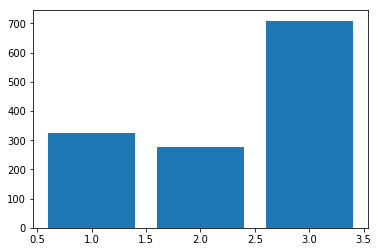

[ 29.       0.9167   2.      30.      25.      48.      63.      39.      53.
  71.      47.      18.      24.      26.      80.          nan  50.      32.
  36.      37.      42.      19.      35.      28.      45.      40.      58.
  22.      41.      44.      59.      60.      33.      17.      11.      14.
  49.      76.      46.      27.      64.      55.      70.      38.      51.
  31.       4.      54.      23.      43.      52.      16.      32.5     21.
  15.      65.      28.5     45.5     56.      13.      61.      34.       6.
  57.      62.      67.       1.      12.      20.       0.8333   8.
   0.6667   7.       3.      36.5     18.5      5.      66.       9.       0.75
  70.5     22.5      0.3333   0.1667  40.5     10.      23.5     34.5     20.5
  30.5     55.5     38.5     14.5     24.5     60.5     74.       0.4167
  11.5     26.5   ]


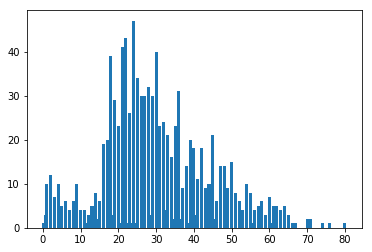

['female' 'male']


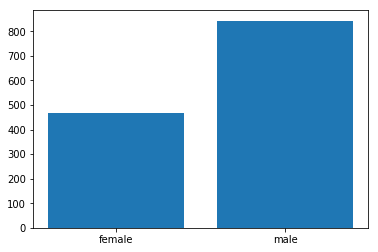

['S' 'C' nan 'Q']


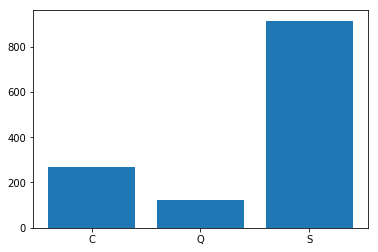

In [79]:
# Write your answer here
import matplotlib.pyplot as plot
titanic=pd.read_excel(DATA_FOLDER+'/titanic.xls')
print(titanic.dtypes)
def histogram(data,column):
    uniques=data[column].unique()
    print(uniques)
    if(type(uniques[0])==type("")):
        uniques=uniques[pd.notnull(uniques)]
        uniques.sort()
    else:
        uniques.sort()
    hist=[]
    for unique in uniques:
        hist.append(sum(data[column]==unique))
    if(type(uniques[0])==type("")):
        plot.bar(range(0,len(uniques)),hist)
        plot.xticks(range(0,len(uniques)), uniques)
    else:
        plot.bar(uniques,hist)
    plot.show()
    return hist
pclass_hist=histogram(titanic,'pclass')
age_hist=histogram(titanic,'age')
sex_hist=histogram(titanic,'sex')
embarked_hist=histogram(titanic,'embarked')

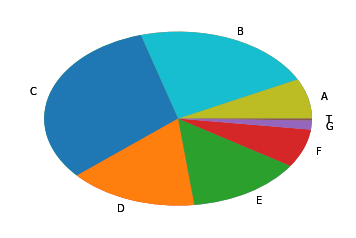

['A10' 'A11' 'A14' 'A16' 'A18' 'A19' 'A20' 'A21' 'A23' 'A24' 'A26' 'A29'
 'A31' 'A32' 'A34' 'A36' 'A5' 'A6' 'A7' 'A9' 'B10' 'B101' 'B102' 'B11'
 'B18' 'B19' 'B20' 'B22' 'B24' 'B26' 'B28' 'B3' 'B30' 'B35' 'B36' 'B37'
 'B38' 'B39' 'B4' 'B41' 'B42' 'B45' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B52 B54 B56' 'B57 B59 B63 B66' 'B58 B60' 'B61' 'B69' 'B71' 'B73' 'B77'
 'B78' 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104'
 'C105' 'C106' 'C110' 'C111' 'C116' 'C118' 'C123' 'C124' 'C125' 'C126'
 'C128' 'C130' 'C132' 'C148' 'C2' 'C22 C26' 'C23 C25 C27' 'C28' 'C30' 'C31'
 'C32' 'C39' 'C45' 'C46' 'C47' 'C49' 'C50' 'C51' 'C52' 'C53' 'C54'
 'C55 C57' 'C6' 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C80' 'C82' 'C83'
 'C85' 'C86' 'C87' 'C89' 'C90' 'C91' 'C92' 'C93' 'C95' 'C97' 'C99' 'D'
 'D10 D12' 'D11' 'D15' 'D17' 'D19' 'D20' 'D21' 'D22' 'D26' 'D28' 'D30'
 'D33' 'D34' 'D35' 'D36' 'D37' 'D38' 'D40' 'D43' 'D45' 'D46' 'D47' 'D48'
 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17' 'E24

In [70]:
cabin=titanic['cabin'].unique()
cabin=cabin[pd.notnull(cabin)]
cabin.sort()
cabinfloors=['A','B','C','D','E','F','G','T']
number=[]
total=0
for cabinfloor in cabinfloors:
    cabins=cabin[pd.Series(cabin).str.startswith(cabinfloor)]
    cabtotal=0
    for cab in cabins:
        cabtotal+=sum(titanic['cabin']==cab)
    number.append(cabtotal)
    total+=cabtotal
plot.pie(number,labels=cabinfloors)
plot.show()
print(cabin)

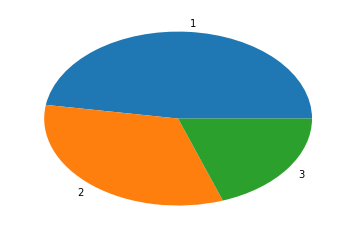

In [75]:
pclasses=titanic['pclass'].unique()
pclasses.sort()
percentages=[]
for pclass in pclasses:
    passengers=titanic[titanic['pclass']==pclass]
    percentage=sum(passengers['survived']==1)
    percentages.append(percentage)
class_lol=percentages
plot.pie(percentages,labels=pclasses)
plot.show()

['female' 'male']


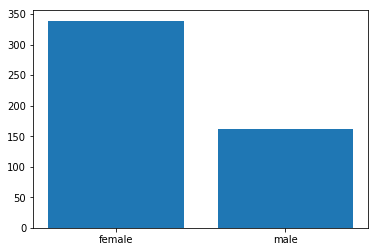

[1 2 3]


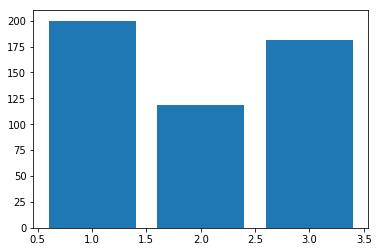

[200, 119, 181]

In [90]:
histogram(titanic[titanic['survived']==1],'sex')
histogram(titanic[titanic['survived']==1],'pclass')

In [89]:
ages_median=titanic['age'].median()
total=[]
survival=[]
def survive_lol(data):
    t=data.shape[0]
    s=sum(data['survived']==1)
    total.append(t)
    survival.append(s)

survive_lol(titanic[titanic['age']<=ages_median])
survive_lol(titanic[titanic['age']>ages_median])
survive_lol(titanic[titanic['sex']=='female'])
survive_lol(titanic[titanic['sex']=='male'])
survive_lol(titanic[titanic['pclass']==1])
survive_lol(titanic[titanic['pclass']==2])
survive_lol(titanic[titanic['pclass']==3])

d={
    'survival rate':pd.Series([survival[i]/total[i] for i in range(0,len(total))],index=['age below 28','age above 28','female','male','1st class','2nd class','3rd class']),
    'total':pd.Series(total,index=['age below 28','age above 28','female','male','1st class','2nd class','3rd class']),
}
lol=pd.DataFrame(d)
lol

,survival rate,total
age below 28,0.410448,536
age above 28,0.405882,510
female,0.727468,466
male,0.190985,843
1st class,0.619195,323
2nd class,0.429603,277
3rd class,0.255289,709
